In [145]:
import pandas as pd
import numpy as np

#load datset
df = pd.read_csv("adult_with_headers.csv")

# View first rows
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [146]:
#rows &columns
df.shape

(32561, 15)

In [147]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [148]:
# Summary statistics for numerical columns
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [149]:
# Check missing values
df.isnull().sum()

#there is no null values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [150]:
# Replace ' ?' with NaN
df.replace(" ?", np.nan, inplace=True)

# Check missing values again
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [151]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include='object').columns


In [152]:
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [153]:
from sklearn.preprocessing import StandardScaler

#Standardization-->StandardScalar (Values lies between -3 to 3)
std_scaler = StandardScaler()
#copying df value into another variable 
std_df = df.copy()
std_df[num_cols] = std_scaler.fit_transform(df[num_cols])
std_df[num_cols]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [ ]:
Standardization scaling:
    It removes all units form a continuous variables and make unit free variables and lies between -3 to +3
Preffered and why?
   *Data is normally distributed (bell-shaped)
   *Features have different units (age, salary, distance, etc.)
   *Dataset contains outliers
   *Model assumes data is centered around zero
   *It centers data at mean = 0 and scales by standard deviation is 1

Common use cases: 
    Linear Regression,Logistic Regression,Support Vector Machines (SVM),PCA,K-Means clustering


In [155]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
mm_df = df.copy()
mm_df[num_cols] = minmax_scaler.fit_transform(df[num_cols])
mm_df[num_cols]

#MinMaxScaler shrinks data into a fixed range (0 to 1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [ ]:
MinMaxScalar:
 MinMaxScaler scales data between 0 and 1 using minimum and maximum values.
     
Preffered and why?
     *Data is not normally distributed
     *There are no major outliers
     *You need values in a fixed range (0 to 1)
     *It preserves the original shape of data
     *Keeps all values within a specific range
     *Helps algorithms that are sensitive to scale differences

Common use cases:
     Neural Networks,K-Nearest Neighbors (KNN),Image processing,Gradient Descent–based models
    

In [156]:
#Encoding Techniques(treat categorical variables)

#One-Hot Encoding (< 5 categories)

#seperating columns which is less than 5categories
one_hot_encod = [col for col in cat_cols if df[col].nunique() < 5]

df = pd.get_dummies(df, columns=one_hot_encod, drop_first=True)
one_hot_encod

['sex', 'income']

In [ ]:
One-Hot Encoding:
    Creates separate binary columns (0/1) for each category

 Pros:
   *No order bias (categories treated equally)
   *Works well for nominal data (no ranking)
   *Safer for Linear & Logistic Regression
   *Easy to understand and interpret

 Cons:
   *Creates many columns (curse of dimensionality)
   *Increases memory and computation
   *Not efficient for high-categories features
   *Can cause multicollinearity (if drop_first not used)

In [159]:
#Label Encoding (> 5 categories)

from sklearn.preprocessing import LabelEncoder

label_encod = [col for col in cat_cols if col not in one_hot_encod]

le = LabelEncoder()

for col in label_encod:
    df[col] = le.fit_transform(df[col])


In [ ]:
Label Encoding:
  Converts categories into numbers (e.g., A→0, B→1, C→2).

 Pros:
    *Simple and fast
    *Does not increase number of columns
    *Efficient for tree-based models
    *Good for ordinal data (low < medium < high)

 Cons:
    *Introduces false order for nominal data
    *Can mislead linear and distance-based models
    *Numbers may be interpreted as having magnitude

In [160]:
#Feature Engineering:

# Feature 1: Capital Net Gain
df['capital_net'] = df['capital_gain'] - df['capital_loss']

# Feature 2: Work intensity
df['hours_per_age'] = df['hours_per_week'] / df['age']


In [ ]:
Explanation:

Feature 1 : capital_net → Net investment impact on income

Feature 2 : hours_per_age → Productivity indicator

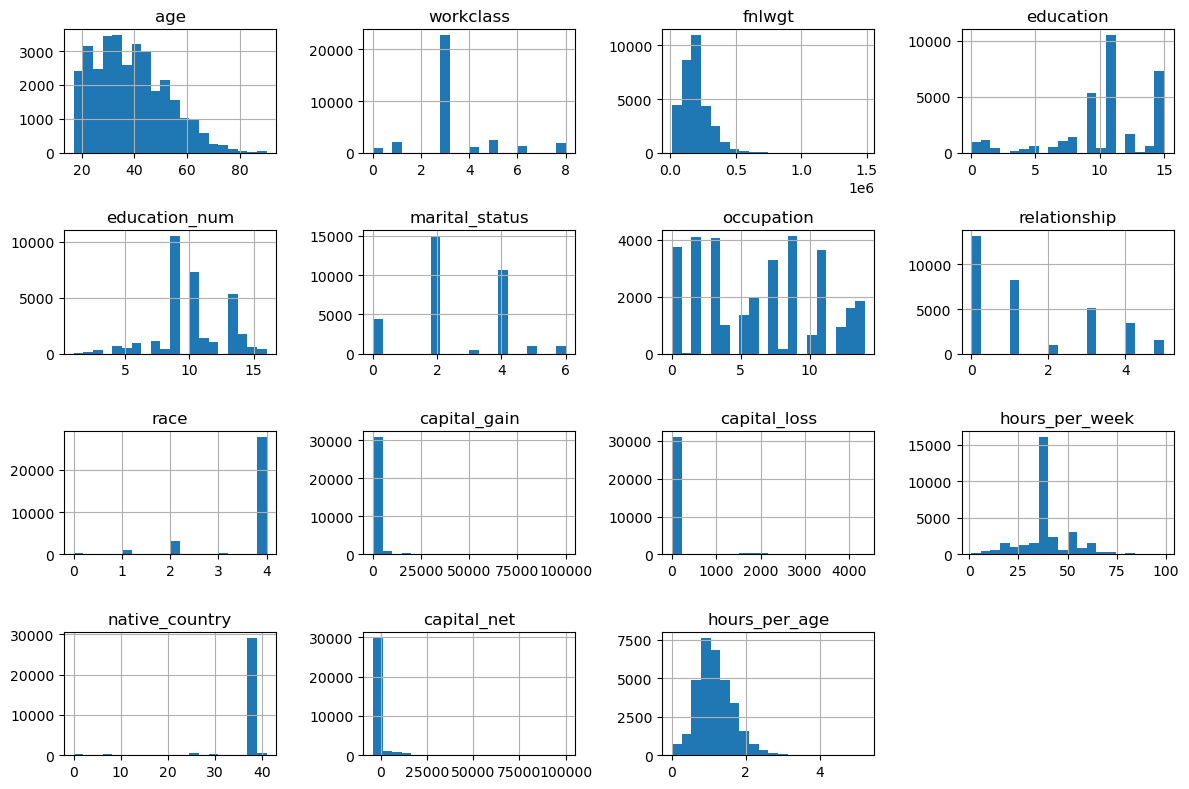

In [161]:
#Log Transformation:

import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

In [ ]:
Log Transformation:     
     Log transformation is used to reduce skewness and the impact of large values by compressing the data scale.
It compresses big values and spreads small values.

why it used:
     *Reduce skewness (make data more symmetric)
     *Handle very large values
     *Reduce the effect of outliers
     *Improve linear relationship between X and Y
     *Log transformation is used to reduce skewness and the impact of large values by compressing the data scale.
         Help models perform better

<Axes: >

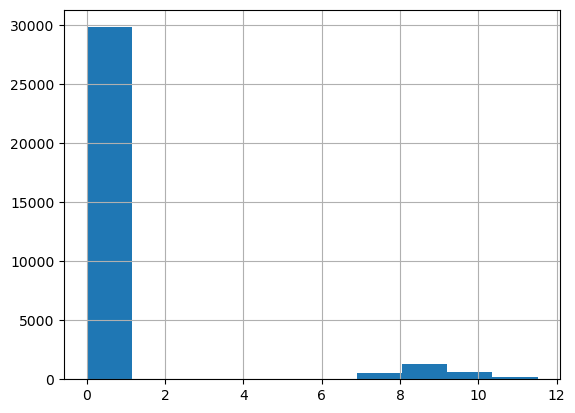

In [162]:
# Log transform capital-gain

df['log_capital_gain'] = np.log1p(df['capital_gain'])
df['log_capital_gain'].hist()

In [ ]:
Explanation
   *capital-gain is highly right-skewed
   *log transformation:
      1.Reduces skewness
      2.Improves linear model performance
      3.Handles zeros safely using log1p

In [163]:
#Final data check
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,capital_net,hours_per_age,log_capital_gain
0,39,6,77516,9,13,4,0,1,4,2174,0,40,38,True,False,2174,1.025641,7.684784
1,50,5,83311,9,13,2,3,0,4,0,0,13,38,True,False,0,0.260000,0.000000
2,38,3,215646,11,9,0,5,1,4,0,0,40,38,True,False,0,1.052632,0.000000
3,53,3,234721,1,7,2,5,0,2,0,0,40,38,True,False,0,0.754717,0.000000
4,28,3,338409,9,13,2,9,5,2,0,0,40,4,False,False,0,1.428571,0.000000


In [164]:
df.shape

(32561, 18)